In [2]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab
import collections
import pymongo
import psycopg2
import paho.mqtt.client as mqtt
import seaborn as sns
from IPython import display
from pandas import datetime
from datetime import timedelta
from pymongo import MongoClient
from scipy import stats

import plotly.graph_objects as go
import plotly as py

In [3]:
py.offline.init_notebook_mode(connected=True)

## Getting Data From Mongo

In [4]:
# Set up MongoDB Client
client_mqtt = mqtt.Client()

# Set up NodeMCU Client
client_mongo = MongoClient('192.168.1.5')
temp_database = client_mongo['temp_collect']
data_1=temp_database['Temperature_1']
data_2=temp_database['Temperature_2']

# Temperature of Fixed Zone (1) - Every Sensor Plot

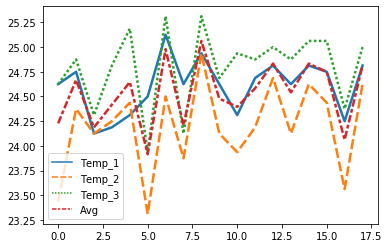

In [5]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
date_time = []
tmp_1=[]
tmp_2=[]
tmp_3=[]
avg=[]
#specifying every n'th minute
time=3
#counter
c=time
for obj in data_1.find():
    time_h=(obj['Date-Time'][11:])
    
    #if("15:" in time_h or "15:0" in time_h):
    if("16:" in time_h):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_1.append(float(obj['tmp_1']))
            tmp_2.append(float(obj['tmp_2']))
            tmp_3.append(float(obj['tmp_3']))
            avg.append((float(obj['tmp_1'])+float(obj['tmp_2'])+float(obj['tmp_3']))/3)
            c=0
        c=c+1
data_time = {'time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Temp_3':tmp_3,'Avg':avg}
d_plot = {'Temp_1':tmp_1,'Temp_2':tmp_2,'Temp_3':tmp_3,'Avg':avg}
data=pd.DataFrame(d_plot)
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [7]:
print('Bikash print staet')

Bikash print staet


### Collecting Data from Zone 1

In [43]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
data_26_1=[]
for obj in data_1.find():
    time_h=(obj['Date-Time'][11:])
    if("14:" in time_h or "15:0" in time_h):
        avg=(float(obj['tmp_1'])+float(obj['tmp_2'])+float(obj['tmp_3']))/3
        data_26_1.append(avg)
    #print (obj['tmp_1'])

### Collecting Data from Zone 2

In [48]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
data_26_2=[]
data_26_h=[]
for obj in data_2.find():
    time_h=(obj['Date-Time'][11:])
    if("14:" in time_h or "15:0" in time_h):
        avg=(float(obj['tmp_1'])+float(obj['tmp_2']))/2
        data_26_2.append(avg)
        data_26_h.append(float(obj['hum']))
    #print (obj['tmp_1'])

In [71]:
x=list(range(64))

### Making the Dataframe

In [82]:
d = {'Index':x,'Temp_Z1':data_26_1,'Temp_Z2':data_26_2,'Humidity':data_26_h}
d_t={'Temp_Z1':data_26_1,'Temp_Z2':data_26_2}
data=pd.DataFrame(d_t)
data['Diff']=data['Temp_Z1']-data['Temp_Z2']
data.head()

### Checking Correlation

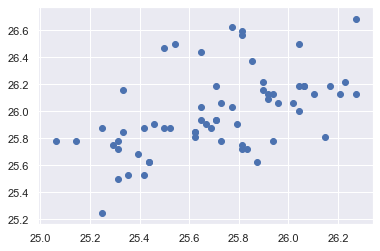

In [115]:
from scipy.stats.stats import pearsonr 
print (pearsonr(data_26_1, data_26_2))
#np.corrcoef(np.asarray(data_26_1), np.asarray(data_26_2))

plt.scatter(data_26_1, data_26_2)
plt.show()



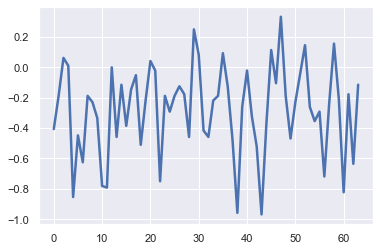

In [124]:
#Ploting a single line
sns.lineplot(data=data['Diff'], palette="tab10", linewidth=2.5)

### Checking Cointegration

In [131]:
import statsmodels.tsa.stattools as ts 
result=ts.coint(data['Temp_Z1'],data['Temp_Z2'])
result
#t-test,pvalue,confidence level critical value
#null hypo - no cointegration

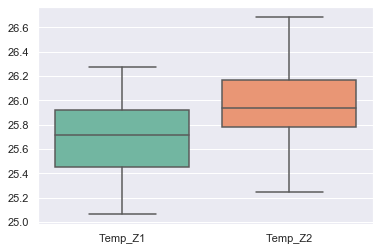

In [120]:
#Box Plot
ax = sns.boxplot(data=data, orient="v", palette="Set2")